# Machine Learning Project
This notebook presents a machine learning algorithm for the powerproduction dataset provided as part of the final project for Module 52954 "Machine Learning and Statistics", GMIT Higher Diploma in Computer Science. It applies a tensorflow learning algorithm to the dataset to allow prediction of power production based on wind speed.

***
## Import Modules

In [1]:
#Import Modules
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

***
## Import dataset


In [2]:
# Read in data into pandas dataframe
df = pd.read_csv("powerproduction.csv")

In [3]:
# Sanity check on import
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [4]:
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [5]:
# Basic descriptive stats on dataset
df.max()

speed     25.000
power    113.556
dtype: float64

In [6]:
df.min()

speed    0.0
power    0.0
dtype: float64

In [7]:
df.mean()

speed    12.590398
power    48.014584
dtype: float64

In [8]:
df.median()

speed    12.5505
power    41.6455
dtype: float64

Text(0, 0.5, 'Power')

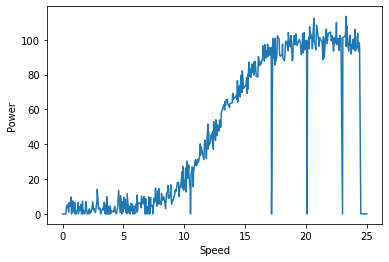

In [9]:
# Quick plot of dataset to visualise relationship
plt.plot(df['speed'], df['power'])
plt.xlabel('Speed')
plt.ylabel('Power')

***
## Clean dataset

On inspection, it appears that there's a sigmoid relationship between speed and power. It would also appear that there are datapoints with winds above 10, but no power production. This may be due to data entry error, recording error, or wind turbines facing perpendicular to the wind. For the sake of training a model, we will remove these points to clean up the dataset for training.

In [10]:
#Remove power of zero where windspeed is above 10
df = df.drop(df[(df.speed > 10) & (df.power == 0)].index)

# Confirm removal (one was present in tail)
df.tail()

,speed,power
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117


Text(0, 0.5, 'Power')

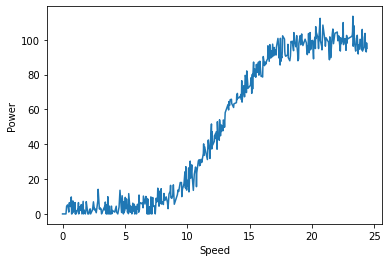

In [11]:
# Quick visual confirmation that these datapoints have been removed
plt.plot(df['speed'], df['power'])
plt.xlabel('Speed')
plt.ylabel('Power')

***
## Prepare dataset for training and testing

We'll split the set in preparation for training and testing, using an 80/20 split.

In [12]:
# Extract 80% of the sample randomly for training
#Adapted from: https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
train = df.sample(frac = 0.8)

# Sort into index order again
train.sort_index()

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
483,24.174,95.869
485,24.249,103.700
486,24.299,93.694
488,24.374,98.223


In [13]:
# Use the remaining 20% of the dataset for testing
#https://stackoverflow.com/a/18360223
train_list = (train.index.values) 
#train_list

# Sort into index order again
test = df.drop(train_list)
test.sort_index()

,speed,power
10,0.551,6.498
16,0.751,0.000
17,0.801,7.271
18,0.826,0.795
23,1.001,6.511
...,...,...
475,23.799,94.671
477,23.849,100.322
482,24.049,93.524
484,24.199,101.419


***
## Train and fit model

In [14]:
#Train model
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [15]:
# Fit the training data
model.fit(train['speed'], train['power'], epochs=500, batch_size=10)

Epoch 1/500
39/39 [==============================] - 0s 749us/step - loss: 4068.4719
Epoch 2/500
39/39 [==============================] - 0s 737us/step - loss: 3834.0503
Epoch 3/500
39/39 [==============================] - 0s 641us/step - loss: 3962.4795
Epoch 4/500
39/39 [==============================] - 0s 641us/step - loss: 3503.0383
Epoch 5/500
39/39 [==============================] - 0s 724us/step - loss: 3386.1899
Epoch 6/500
39/39 [==============================] - 0s 742us/step - loss: 3098.5212
Epoch 7/500
39/39 [==============================] - 0s 680us/step - loss: 2929.4465
Epoch 8/500
39/39 [==============================] - 0s 652us/step - loss: 2952.6134
Epoch 9/500
39/39 [==============================] - 0s 713us/step - loss: 2404.6047
Epoch 10/500
39/39 [==============================] - 0s 752us/step - loss: 2578.8044
Epoch 11/500
39/39 [==============================] - 0s 667us/step - loss: 2328.7863
Epoch 12/500
39/39 [==============================] - 0s 645us/

39/39 [==============================] - 0s 626us/step - loss: 155.0789
Epoch 98/500
39/39 [==============================] - 0s 609us/step - loss: 151.0745
Epoch 99/500
39/39 [==============================] - 0s 604us/step - loss: 142.8781
Epoch 100/500
39/39 [==============================] - 0s 615us/step - loss: 142.4290
Epoch 101/500
39/39 [==============================] - 0s 583us/step - loss: 143.7643
Epoch 102/500
39/39 [==============================] - 0s 588us/step - loss: 134.0314
Epoch 103/500
39/39 [==============================] - 0s 615us/step - loss: 136.1592
Epoch 104/500
39/39 [==============================] - 0s 609us/step - loss: 138.5872
Epoch 105/500
39/39 [==============================] - 0s 611us/step - loss: 122.6847
Epoch 106/500
39/39 [==============================] - 0s 569us/step - loss: 123.0627
Epoch 107/500
39/39 [==============================] - 0s 620us/step - loss: 125.6413
Epoch 108/500
39/39 [==============================] - 0s 611us/step -

39/39 [==============================] - 0s 749us/step - loss: 51.8298
Epoch 194/500
39/39 [==============================] - 0s 751us/step - loss: 51.2125
Epoch 195/500
39/39 [==============================] - 0s 834us/step - loss: 54.3263
Epoch 196/500
39/39 [==============================] - 0s 796us/step - loss: 48.2010
Epoch 197/500
39/39 [==============================] - 0s 758us/step - loss: 47.0362
Epoch 198/500
39/39 [==============================] - 0s 797us/step - loss: 52.5270
Epoch 199/500
39/39 [==============================] - 0s 602us/step - loss: 49.9852
Epoch 200/500
39/39 [==============================] - 0s 588us/step - loss: 47.5565
Epoch 201/500
39/39 [==============================] - 0s 631us/step - loss: 53.3766
Epoch 202/500
39/39 [==============================] - 0s 755us/step - loss: 52.7516
Epoch 203/500
39/39 [==============================] - 0s 713us/step - loss: 50.8410
Epoch 204/500
39/39 [==============================] - 0s 833us/step - loss: 48

39/39 [==============================] - 0s 608us/step - loss: 27.0927
Epoch 290/500
39/39 [==============================] - 0s 682us/step - loss: 27.2639
Epoch 291/500
39/39 [==============================] - 0s 608us/step - loss: 30.5135
Epoch 292/500
39/39 [==============================] - 0s 659us/step - loss: 25.8816
Epoch 293/500
39/39 [==============================] - 0s 643us/step - loss: 28.6121
Epoch 294/500
39/39 [==============================] - 0s 616us/step - loss: 22.8740
Epoch 295/500
39/39 [==============================] - 0s 648us/step - loss: 27.0022
Epoch 296/500
39/39 [==============================] - 0s 594us/step - loss: 25.3821
Epoch 297/500
39/39 [==============================] - 0s 646us/step - loss: 26.4864
Epoch 298/500
39/39 [==============================] - 0s 633us/step - loss: 25.8146
Epoch 299/500
39/39 [==============================] - 0s 625us/step - loss: 24.8774
Epoch 300/500
39/39 [==============================] - 0s 597us/step - loss: 29

39/39 [==============================] - 0s 607us/step - loss: 18.4245
Epoch 386/500
39/39 [==============================] - 0s 706us/step - loss: 18.8846
Epoch 387/500
39/39 [==============================] - 0s 827us/step - loss: 19.9985
Epoch 388/500
39/39 [==============================] - 0s 862us/step - loss: 17.2593
Epoch 389/500
39/39 [==============================] - 0s 814us/step - loss: 18.6342
Epoch 390/500
39/39 [==============================] - 0s 796us/step - loss: 22.4553
Epoch 391/500
39/39 [==============================] - 0s 782us/step - loss: 19.7813
Epoch 392/500
39/39 [==============================] - 0s 711us/step - loss: 19.2106
Epoch 393/500
39/39 [==============================] - 0s 643us/step - loss: 20.2983
Epoch 394/500
39/39 [==============================] - 0s 577us/step - loss: 22.7985
Epoch 395/500
39/39 [==============================] - 0s 621us/step - loss: 19.7181
Epoch 396/500
39/39 [==============================] - 0s 596us/step - loss: 19

39/39 [==============================] - 0s 589us/step - loss: 17.7123
Epoch 482/500
39/39 [==============================] - 0s 648us/step - loss: 18.8954
Epoch 483/500
39/39 [==============================] - 0s 599us/step - loss: 16.5981
Epoch 484/500
39/39 [==============================] - 0s 654us/step - loss: 17.4368
Epoch 485/500
39/39 [==============================] - 0s 610us/step - loss: 18.2191
Epoch 486/500
39/39 [==============================] - 0s 628us/step - loss: 15.9023
Epoch 487/500
39/39 [==============================] - 0s 593us/step - loss: 18.2428
Epoch 488/500
39/39 [==============================] - 0s 641us/step - loss: 16.0976
Epoch 489/500
39/39 [==============================] - 0s 605us/step - loss: 18.3670
Epoch 490/500
39/39 [==============================] - 0s 653us/step - loss: 18.9839
Epoch 491/500
39/39 [==============================] - 0s 628us/step - loss: 15.7441
Epoch 492/500
39/39 [==============================] - 0s 583us/step - loss: 20

It would appear that the model 'bottoms-out' at a loss of around 15. This might be adequate for the purposes of this dataset. Let's see how it looks:

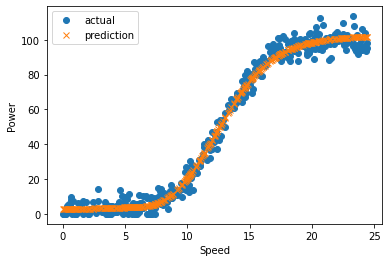

In [16]:
# Visualise how well the model fits the training data
plt.plot(train['speed'], train['power'], 'o', label='actual')
plt.plot(train['speed'], model.predict(train['speed']), 'x', label='prediction')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

The model fits the training data quite well. Next we will visualise if the test data set aligns with the overall dataset:

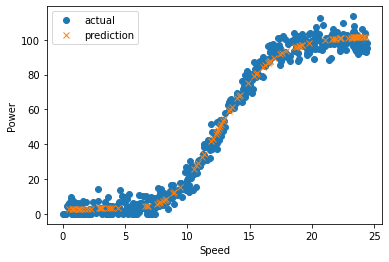

In [17]:
# Visualise the test dataset predictions against the actual dataset
plt.plot(df['speed'], df['power'], 'o', label='actual')
plt.plot(test['speed'], model.predict(test['speed']), 'x', label='prediction')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

The test data set matches the actual dataset closely. We can also quantify the 'best' loss for this model:

In [18]:
# Evaluate the neural network on the test data.
model.evaluate(test['speed'], test['power'])

4/4 [==============================] - 0s 969us/step - loss: 17.3725


17.37252426147461

Finally, as a sanity check, we will run a few predictions and see if the predicted value makes 'sense':

In [19]:
print(f'The predicted power production with a wind-speed of 3.2 is {model.predict([3.2])}')

The predicted power production with a wind-speed of 3.2 is [[3.3132849]]


In [20]:
print(f'The predicted power production with a wind-speed of 14.7 is {model.predict([14.7])}')

The predicted power production with a wind-speed of 14.7 is [[73.58739]]


In [21]:
print(f'The predicted power production with a wind-speed of 25.5 is {model.predict([25.5])}')

The predicted power production with a wind-speed of 25.5 is [[101.97772]]


These values appear sensical. The model is ready to deploy.

***
# END